<a href="https://colab.research.google.com/github/rajvirvyas/Magic_the_Gathering_Analysis/blob/main/Magic_the_Gathering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Magic the Gathering Analysis**

**Let's Analyze Magic the Gathering cards, using data from the scryfall api.**


###Testing API calls

**First, lets see how many cards exist that are of type planeswalker and with the word Jace in the name just to test out our API calls**

In [ ]:
import pandas as pd
import requests
import time
from pandas.io.json import json_normalize

allfilteredcards=requests.get("https://api.scryfall.com/cards/search?q=type%3Aplaneswalker+name%3AJace").json()
(allfilteredcards["total_cards"])

13

**There are 13 total cards that are Jace and Planeswalkers.**

### Themed Set Analysis

**Ok, now we will look at two different 'blocks' of themed sets, namely:**
1. Khans of Tarkir
2. Return to Ravnica

**Each 'block' consists of three distinct sets:**

1.   Khans of Tarkir, Fate Reforged, Dragons of Tarkir
2.   Return to Ravnica, Gatecrash, Dragon's Maze

**Let's get a sample of 20 booster packs from each of these sets and the goal is to get one large dataset with all the cards from these sets with a column specifying which booster pack a card is from, along with other variables helpful for analysis.**




**The Khans of Tarkir block**

**Learned some info about the booster packs and blocks through https://en.wikipedia.org/wiki/List_of_Magic:_The_Gathering_sets**

In [ ]:
#Khans of Tarkir (KTK)
ktk=pd.read_table("https://www.dropbox.com/s/k5vs1jux3rxbeeo/KTK_booster.txt?dl=1",header=None, names=["Card Name"])
ktk["Booster Pack"]="KTK"
ktk["Block"]="KTK"

In [ ]:
#Fate Reforged (FRF)
frf=pd.read_table("https://www.dropbox.com/s/ajhponzkzs5j1h0/FRF_booster.txt?dl=1",header=None, names=["Card Name"])
frf["Booster Pack"]="FRF"
frf["Block"]="KTK"

In [ ]:
#Dragons of Tarkir (DTK)
dtk=pd.read_table("https://www.dropbox.com/s/k2vq8rswxhqgy4f/DTK_booster.txt?dl=1",header=None, names=["Card Name"])
dtk["Booster Pack"]="DTK"
dtk["Block"]="KTK"

**The Return to Ravnica block**

In [ ]:
#Dragon's Maze (DGM)
dgm=pd.read_table("https://www.dropbox.com/s/xlr0qdt0fk23soc/DGM_booster.txt?dl=1",header=None, names=["Card Name"])
dgm["Booster Pack"]="DGM"
dgm["Block"]="RTR"


In [ ]:
#Gatecrash (GTC)
gtc=pd.read_table("https://www.dropbox.com/s/aufkqbps185f8pu/GTC_booster.txt?dl=1",header=None, names=["Card Name"])
gtc["Booster Pack"]="GTC"
gtc["Block"]="RTR"


In [ ]:
#Return to Ravnica (RTR)
rtr=pd.read_table("https://www.dropbox.com/s/x6eyg9fgpq2gjx6/RTR_booster.txt?dl=1",header=None, names=["Card Name"])
rtr["Booster Pack"]="RTR"
rtr["Block"]="RTR"

**Each booster pack is 15 cards, however RTR only seems to give me 3 booster packs**

In [ ]:
all_cards= pd.concat([ktk,frf,dtk,rtr,gtc,dgm], ignore_index=True) #to treat every card with new index
all_cards

#for cleaning, I will remove 01 so that we can make calls using api without the 01; not sure what 01 means here
all_cards_cleaned = all_cards.replace('01 ','', regex=True) #documentation
all_cards_cleaned





Card Name Booster Pack Block
0     High Sentinels of Arashin          KTK   KTK
1                Armament Corps          KTK   KTK
2         Bellowing Saddlebrute          KTK   KTK
3                   Dragon Grip          KTK   KTK
4                    Swift Kick          KTK   KTK
...                         ...          ...   ...
1540             Hired Torturer          DGM   RTR
1541             Hired Torturer          DGM   RTR
1542              Boros Mastiff          DGM   RTR
1543           Orzhov Cluestone          DGM   RTR
1544                 Phytoburst          DGM   RTR

[1545 rows x 3 columns]

Now, I can make the api calls using a for loop.

In [ ]:
info_list=[]
for name in all_cards_cleaned["Card Name"]:
   info_list.append(requests.get("https://api.scryfall.com/cards/named?exact="+name).json())
   time.sleep(0.1) #half a second took too long

info_list

[{'object': 'card',
  'id': '2002d263-3fe0-481a-b389-84e281b009d7',
  'oracle_id': 'f0e7d147-379e-45b7-bfc4-d926637e060d',
  'multiverse_ids': [489592],
  'arena_id': 72170,
  'tcgplayer_id': 216368,
  'cardmarket_id': 473759,
  'name': 'High Sentinels of Arashin',
  'lang': 'en',
  'released_at': '2020-07-17',
  'uri': 'https://api.scryfall.com/cards/2002d263-3fe0-481a-b389-84e281b009d7',
  'scryfall_uri': 'https://scryfall.com/card/jmp/108/high-sentinels-of-arashin?utm_source=api',
  'layout': 'normal',
  'highres_image': True,
  'image_status': 'highres_scan',
  'image_uris': {'small': 'https://cards.scryfall.io/small/front/2/0/2002d263-3fe0-481a-b389-84e281b009d7.jpg?1600696520',
   'normal': 'https://cards.scryfall.io/normal/front/2/0/2002d263-3fe0-481a-b389-84e281b009d7.jpg?1600696520',
   'large': 'https://cards.scryfall.io/large/front/2/0/2002d263-3fe0-481a-b389-84e281b009d7.jpg?1600696520',
   'png': 'https://cards.scryfall.io/png/front/2/0/2002d263-3fe0-481a-b389-84e281b009d7

In [ ]:

data=pd.json_normalize(info_list)
data
#data is a df



object                                    id  \
0      card  2002d263-3fe0-481a-b389-84e281b009d7   
1      card  a5c69876-809d-4af3-9fd6-3bac41541dad   
2      card  a1939b5d-e24f-4e4b-b4c5-8bdb232d8926   
3      card  0269d5bd-d8aa-465b-bfe9-6703937f933c   
4      card  2dc3120c-7e04-4c4a-af16-da264593a1d1   
...     ...                                   ...   
1540   card  62e9f79e-6606-4c9b-838c-eda5d8cc612c   
1541   card  62e9f79e-6606-4c9b-838c-eda5d8cc612c   
1542   card  27a3bfb6-3843-4bda-bbcb-905e4b351dea   
1543   card  338ee065-a4a6-4120-b0bd-3e940f458294   
1544   card  7507afc4-f504-4eb2-a86d-f99bc2860838   

                                 oracle_id multiverse_ids  arena_id  \
0     f0e7d147-379e-45b7-bfc4-d926637e060d       [489592]   72170.0   
1     3b93427c-5b40-4119-96ae-7dce3ca2bbb9       [386480]       NaN   
2     e1e5ad8c-d425-44ad-a8f6-e9290667f6f5       [386488]       NaN   
3     1e83a750-bf86-468e-8342-2c4eb7700dfd       [386522]       NaN   
4     8c54fd75-e89f-490e-90dd-788f22b6e316       [386688]       NaN   
...                                    ...            ...       ...   
1540  b1ad2fd3-9f39-49e7-92c5-57ab0e1da5b7       [369048]       NaN   
1541  b1ad2fd3-9f39-49e7-92c5-57ab0e1da5b7       [369048]       NaN   
1542  bcbaef07-1d5b-457b-b373-77d3a2884b39       [369028]       NaN   
1543  09650a76-05c4-40a0-b861-d146b3ba87d6       [405330]       NaN   
1544  d68d175f-f59c-4995-84d4-fc593280194b       [369054]       NaN   

      tcgplayer_id  cardmarket_id                       name lang released_at  \
0         216368.0       473759.0  High Sentinels of Arashin   en  2020-07-17   
1          93193.0       269530.0             Armament Corps   en  2014-09-26   
2          93198.0       269465.0      Bellowing Saddlebrute   en  2014-09-26   
3          93229.0       269495.0                Dragon Grip   en  2014-09-26   
4          93235.0       269502.0                 Swift Kick   en  2014-09-26   
...            ...            ...                        ...  ...         ...   
1540       67972.0       261514.0             Hired Torturer   en  2013-05-03   
1541       67972.0       261514.0             Hired Torturer   en  2013-05-03   
1542       67957.0       261498.0              Boros Mastiff   en  2013-05-03   
1543      108096.0       286021.0           Orzhov Cluestone   en  2015-11-13   
1544       67986.0       261528.0                 Phytoburst   en  2013-05-03   

      ...  mtgo_id mtgo_foil_id watermark  \
0     ...      NaN          NaN       NaN   
1     ...  54418.0      54419.0     abzan   
2     ...  54100.0      54101.0     mardu   
3     ...  54366.0      54367.0     temur   
4     ...  54356.0      54357.0       NaN   
...   ...      ...          ...       ...   
1540  ...  48226.0      48227.0       NaN   
1541  ...  48226.0      48227.0       NaN   
1542  ...  48326.0      48327.0     boros   
1543  ...      NaN          NaN       NaN   
1544  ...  48220.0      48221.0       NaN   

                                            flavor_text produced_mana  \
0                                                   NaN           NaN   
1     The Abzan avoid extended supply lines by incor...           NaN   
2                                                   NaN           NaN   
3                                                   NaN           NaN   
4     Shintan sensed the malice in his opponent, but...           NaN   
...                                                 ...           ...   
1540  "Follow your passion, I always say. Might as w...           NaN   
1541  "Follow your passion, I always say. Might as w...           NaN   
1542                                                NaN           NaN   
1543  A symbol of power and wealth, the only commodi...        [B, W]   
1544  Phytohydras are banned as houseplants in many ...           NaN   

     all_parts  promo_types frame_effects loyalty card_faces  
0          NaN          NaN           NaN     NaN        NaN 

**Now, I can flatten it**

In [ ]:
merged=all_cards_cleaned.merge(data,left_index=True, right_index=True)
merged

Card Name Booster Pack Block object  \
0     High Sentinels of Arashin          KTK   KTK   card   
1                Armament Corps          KTK   KTK   card   
2         Bellowing Saddlebrute          KTK   KTK   card   
3                   Dragon Grip          KTK   KTK   card   
4                    Swift Kick          KTK   KTK   card   
...                         ...          ...   ...    ...   
1540             Hired Torturer          DGM   RTR   card   
1541             Hired Torturer          DGM   RTR   card   
1542              Boros Mastiff          DGM   RTR   card   
1543           Orzhov Cluestone          DGM   RTR   card   
1544                 Phytoburst          DGM   RTR   card   

                                        id  \
0     2002d263-3fe0-481a-b389-84e281b009d7   
1     a5c69876-809d-4af3-9fd6-3bac41541dad   
2     a1939b5d-e24f-4e4b-b4c5-8bdb232d8926   
3     0269d5bd-d8aa-465b-bfe9-6703937f933c   
4     2dc3120c-7e04-4c4a-af16-da264593a1d1   
...                                    ...   
1540  62e9f79e-6606-4c9b-838c-eda5d8cc612c   
1541  62e9f79e-6606-4c9b-838c-eda5d8cc612c   
1542  27a3bfb6-3843-4bda-bbcb-905e4b351dea   
1543  338ee065-a4a6-4120-b0bd-3e940f458294   
1544  7507afc4-f504-4eb2-a86d-f99bc2860838   

                                 oracle_id multiverse_ids  arena_id  \
0     f0e7d147-379e-45b7-bfc4-d926637e060d       [489592]   72170.0   
1     3b93427c-5b40-4119-96ae-7dce3ca2bbb9       [386480]       NaN   
2     e1e5ad8c-d425-44ad-a8f6-e9290667f6f5       [386488]       NaN   
3     1e83a750-bf86-468e-8342-2c4eb7700dfd       [386522]       NaN   
4     8c54fd75-e89f-490e-90dd-788f22b6e316       [386688]       NaN   
...                                    ...            ...       ...   
1540  b1ad2fd3-9f39-49e7-92c5-57ab0e1da5b7       [369048]       NaN   
1541  b1ad2fd3-9f39-49e7-92c5-57ab0e1da5b7       [369048]       NaN   
1542  bcbaef07-1d5b-457b-b373-77d3a2884b39       [369028]       NaN   
1543  09650a76-05c4-40a0-b861-d146b3ba87d6       [405330]       NaN   
1544  d68d175f-f59c-4995-84d4-fc593280194b       [369054]       NaN   

      tcgplayer_id  cardmarket_id  ...  mtgo_id mtgo_foil_id watermark  \
0         216368.0       473759.0  ...      NaN          NaN       NaN   
1          93193.0       269530.0  ...  54418.0      54419.0     abzan   
2          93198.0       269465.0  ...  54100.0      54101.0     mardu   
3          93229.0       269495.0  ...  54366.0      54367.0     temur   
4          93235.0       269502.0  ...  54356.0      54357.0       NaN   
...            ...            ...  ...      ...          ...       ...   
1540       67972.0       261514.0  ...  48226.0      48227.0       NaN   
1541       67972.0       261514.0  ...  48226.0      48227.0       NaN   
1542       67957.0       261498.0  ...  48326.0      48327.0     boros   
1543      108096.0       286021.0  ...      NaN          NaN       NaN   
1544       67986.0       261528.0  ...  48220.0      48221.0       NaN   

                                            flavor_text produced_mana  \
0                                                   NaN           NaN   
1     The Abzan avoid extended supply lines by incor...           NaN   
2                                                   NaN           NaN   
3                                                   NaN           NaN   
4     Shintan sensed the malice in his opponent, but...           NaN   
...                                                 ...           ...   
1540  "Follow your passion, I always say. Might as w...           NaN   
1541  "Follow your passion, I always say. Might as w...           NaN   
1542                                                NaN           NaN   
1543  A symbol of power and wealth, the only commodi...        [B, W]   
1544  Phytohydras are banned as houseplants in many ...           NaN   

     all_parts  promo_types frame_effects loyalty  card_faces  
0          NaN          NaN           NaN     NaN    

**Now I can pick which variables I want to keep in my new dataframe:**

**I chose to take a look at-**
* Card Name: tells me what the title of the card is
* Booster pack: tells me what the booster pack a given card is from; I created this one for each of the 6 dropbox links
* power: if I want to get power attribute for a card
* toughness: if I want to get toughness attribute for a card
* mana_cost: cards that are non-mana
* cmc: a card's mana value
* oracle_text: card mechanic text (q4)
* colors
* type_line
* color_identity
* rarity
* edhrec_rank
* prices.usd



In [ ]:
merged= merged[['Card Name',"Booster Pack","Block",'power',"toughness","oracle_text","mana_cost","cmc","colors","color_identity","type_line","rarity","edhrec_rank", "prices.usd"]]
merged_non_mana= merged[merged["type_line"].str.contains("Land") == False]
merged_non_mana

Card Name Booster Pack Block power toughness  \
0     High Sentinels of Arashin          KTK   KTK     3         4   
1                Armament Corps          KTK   KTK     4         4   
2         Bellowing Saddlebrute          KTK   KTK     4         5   
3                   Dragon Grip          KTK   KTK   NaN       NaN   
4                    Swift Kick          KTK   KTK   NaN       NaN   
...                         ...          ...   ...   ...       ...   
1540             Hired Torturer          DGM   RTR     2         3   
1541             Hired Torturer          DGM   RTR     2         3   
1542              Boros Mastiff          DGM   RTR     2         2   
1543           Orzhov Cluestone          DGM   RTR   NaN       NaN   
1544                 Phytoburst          DGM   RTR   NaN       NaN   

                                            oracle_text     mana_cost  cmc  \
0     Flying\nHigh Sentinels of Arashin gets +1/+1 f...        {3}{W}  4.0   
1     When Armament Corps enters the battlefield, di...  {2}{W}{B}{G}  5.0   
2     Raid — When Bellowing Saddlebrute enters the b...        {3}{B}  4.0   
3     Ferocious — If you control a creature with pow...        {2}{R}  3.0   
4     Target creature you control gets +1/+0 until e...        {3}{R}  4.0   
...                                                 ...           ...  ...   
1540  Defender\n{3}{B}, {T}: Target opponent loses 2...        {2}{B}  3.0   
1541  Defender\n{3}{B}, {T}: Target opponent loses 2...        {2}{B}  3.0   
1542  Battalion — Whenever Boros Mastiff and at leas...        {1}{W}  2.0   
1543  {T}: Add {W} or {B}.\n{W}{B}, {T}, Sacrifice O...           {3}  3.0   
1544      Target creature gets +5/+5 until end of turn.        {1}{G}  2.0   

         colors color_identity                 type_line    rarity  \
0           [W]            [W]   Creature — Bird Soldier      rare   
1     [B, G, W]      [B, G, W]  Creature — Human Soldier  uncommon   
2           [B]            [B]    Creature — Orc Warrior  uncommon   
3           [R]            [R]        Enchantment — Aura  uncommon   
4           [R]            [R]                   Instant    common   
...         ...            ...                       ...       ...   
1540        [B]            [B]    Creature — Human Rogue    common   
1541        [B]            [B]    Creature — Human Rogue    common   
1542        [W]            [W]            Creature — Dog    common   
1543         []         [B, W]                  Artifact    common   
1544        [G]            [G]                   Sorcery    common   

      edhrec_rank prices.usd  
0         11128.0       0.16  
1         20079.0       0.04  
2         22024.0       0.08  
3         17162.0       0.16  
4         18837.0       0.04  
...           ...        ...  
1540      21868.0       0.03  
1541      21868.0       0.03  
1542      15979.0       0.04  
1543       6296.0       0.15  
1544      11717.0       0.12  

[1392 rows x 14 columns]

### Card Mechanic Similarities

**Now that we have a dataset to work with, we can take a look at the card mechanic text(oracle_text) and try to visualize how similar the mechanics are within each release.**

**First, let's preprocess the data by converting text data to numeric, dealing with na values and **

In [ ]:
#Preprocessing:
merged["power"]=merged["power"].fillna(0).replace("*",0).astype(int)
merged["toughness"]=merged["toughness"].fillna(0).replace("*",0).astype(int)
merged["cmc"]=merged["cmc"].fillna(0)
merged["edhrec_rank"]=merged["edhrec_rank"].fillna(0)
merged["prices.usd"]=merged["prices.usd"].fillna(0).astype(float)
merged["colors"]=merged["colors"].astype(str).str[1:].str[:-1]
merged["color_identity"]=merged["color_identity"].astype(str).str[1:].str[:-1]
merged['oracle_text'] = merged['oracle_text'].astype(str)



<ipython-input-14-a98c887c7ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["power"]=merged["power"].fillna(0).replace("*",0).astype(int)
<ipython-input-14-a98c887c7ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["toughness"]=merged["toughness"].fillna(0).replace("*",0).astype(int)
<ipython-input-14-a98c887c7ce4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

**Will use tdf-idf first on the oracle text column**

In [ ]:
merged_non_mana["oracle_text"]

0       Flying\nHigh Sentinels of Arashin gets +1/+1 f...
1       When Armament Corps enters the battlefield, di...
2       Raid — When Bellowing Saddlebrute enters the b...
3       Ferocious — If you control a creature with pow...
4       Target creature you control gets +1/+0 until e...
                              ...                        
1540    Defender\n{3}{B}, {T}: Target opponent loses 2...
1541    Defender\n{3}{B}, {T}: Target opponent loses 2...
1542    Battalion — Whenever Boros Mastiff and at leas...
1543    {T}: Add {W} or {B}.\n{W}{B}, {T}, Sacrifice O...
1544        Target creature gets +5/+5 until end of turn.
Name: oracle_text, Length: 1392, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

merged_non_mana['oracle_text'] = merged_non_mana['oracle_text'].astype(str)


vec = TfidfVectorizer(norm=None, max_features=55) # Do not normalize.
vec.fit(merged_non_mana["oracle_text"]) # This determines the vocabulary.
tf_idf_sparse = vec.transform(merged_non_mana["oracle_text"])
tf_idf_sparse

<ipython-input-16-fb9273a90930>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_non_mana['oracle_text'] = merged_non_mana['oracle_text'].astype(str)


<1392x55 sparse matrix of type '<class 'numpy.float64'>'
	with 13305 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import StandardScaler
non_mana_df= pd.DataFrame(
    tf_idf_sparse.todense(),
    columns=vec.get_feature_names_out()
)
non_mana_df
X_train = non_mana_df
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

**Need to condense all the columns to be two columns for x and y in pipeline training;I found documentation on sklearn for how to do this: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


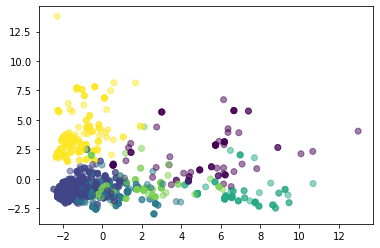

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model = KMeans(n_clusters=6)
model.fit(X_train_std)

PCA = PCA(n_components = 2) # Using PCA to remove cols which has less co-relation
Std_PCA = PCA.fit_transform(X_train_std)
df=pd.DataFrame(Std_PCA, columns=["Condensed1","Condensed2"])
df
centroids = model.cluster_centers_
clusters = model.labels_

clusters

plt.scatter(x=df["Condensed1"], y=df["Condensed2"], c=clusters,marker="o", alpha=0.5)

<ipython-input-19-a1035fdbdc4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_non_mana["Cluster"]= clusters


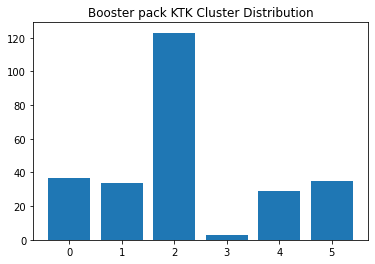

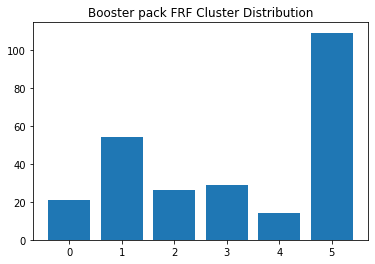

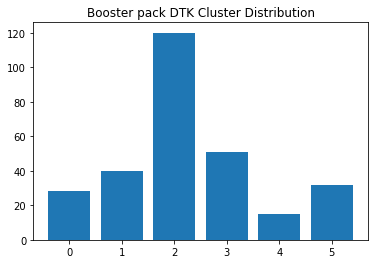

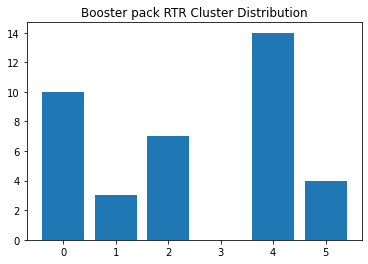

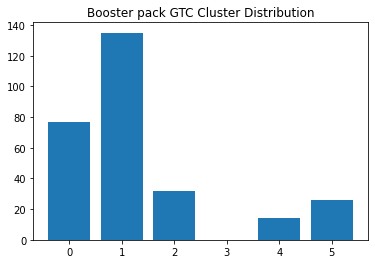

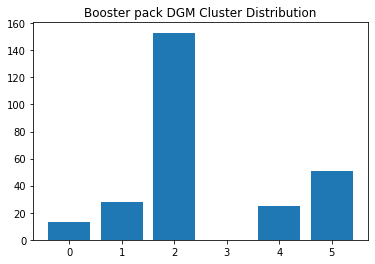

In [ ]:
import matplotlib.pyplot as plt

merged_non_mana["Cluster"]= clusters
for booster in merged_non_mana["Booster Pack"].unique():  #there are 6 unique booster packs as we know
  filtered= merged_non_mana[merged_non_mana["Booster Pack"]==booster]
  plt.title("Booster pack "+booster+" Cluster Distribution")
  plt.bar(x=filtered["Cluster"].unique(), height=filtered["Cluster"].value_counts())  # size should be based off the value_counts size
  plt.show()

#couldnt use subplots here


Oracle text is a poor predictor, as if it worked perfectly then we would see the 6 clusters match correctly to the six packs. For all the RTR block cards, it can't place them in some clusters, which is troubling.

In [ ]:
#from lab 5

# want to get most freq terms from tf_idf in each cluster
centroids=centroids.argsort()[:,:-1]
most_freq=[]
words=vec.get_feature_names_out()
for i in range(6): #for each cluster
  freq_list=[]
  print("Cluster",i,"-", end="")
  for term_idx in centroids[i, :10]:   #term_idx is from centorids=model_clusters
    print(words[term_idx], end=",")
  print()


Cluster 0 -cost,on,creature,the,to,end,enters,any,turn,that,
Cluster 1 -that,deals,this,library,battlefield,put,draw,its,enters,spell,
Cluster 2 -the,draw,library,to,or,control,creature,can,creatures,for,
Cluster 3 -player,each,control,to,or,from,draw,deals,creature,face,
Cluster 4 -cast,that,graveyard,gets,hand,each,from,control,cost,cards,
Cluster 5 -card,library,or,flying,any,cost,target,battlefield,may,if,


**Question 5**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

X_train=merged[['Card Name',"Booster Pack",'power',"toughness","mana_cost","cmc","colors","color_identity","type_line","rarity","edhrec_rank", "prices.usd"]]
y_train=merged["Block"]

ct= make_column_transformer(
    (StandardScaler(), ["power","toughness","cmc","edhrec_rank","prices.usd"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Card Name","mana_cost","Booster Pack","type_line","colors","color_identity","rarity"]),
    remainder="drop"
)
pipeline=make_pipeline(ct,KNeighborsClassifier(n_neighbors=10))
pipeline.fit(X_train, y_train)

# define the test data (recall that scikit-learn expects a 2D-array)
pipeline.predict(X_train)



array(['KTK', 'KTK', 'KTK', ..., 'RTR', 'RTR', 'RTR'], dtype=object)

Now I can predict what block a card belongs to

In [ ]:
#from workbook:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    pipeline,
    param_grid={"kneighborsclassifier__n_neighbors": range(10, 50)},  #starting at 1 gives k at 1, 10 gave me something better
    scoring="f1_macro", #opted for f1_score since it is a combination of precision and recall and it is what was given in workbook
    cv=10
)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'kneighborsclassifier__n_neighbors': 49}

Best k is 49

Now I will use this best k for new models, for each feature in my merged dataframe. That way, I can see the f1 score for each feature

In [ ]:
from sklearn.model_selection import cross_val_score
scale_these=["power","toughness","cmc","edhrec_rank","prices.usd"]
hot_encode_these=["mana_cost","type_line","colors","color_identity","rarity"]

f1_scores={}
for feature in scale_these:
  X_train= merged[[feature]]
  ct= make_column_transformer(
      (StandardScaler(), [feature]),
      remainder="drop"
      )
  pipeline=make_pipeline(ct, KNeighborsClassifier(n_neighbors=49))
  pipeline.fit(X_train,y_train)
  f1_scores[feature]=cross_val_score(pipeline, X_train, y_train, cv=10, scoring="f1_macro").mean()  #get the avg f1 score for each feature

for feature in hot_encode_these:
  X_train= merged[[feature]]
  ct= make_column_transformer(
      (OneHotEncoder(handle_unknown="ignore"), [feature]),
      remainder="drop"
      )
  pipeline=make_pipeline(ct, KNeighborsClassifier(n_neighbors=49))
  pipeline.fit(X_train,y_train)
  f1_scores[feature]=cross_val_score(pipeline, X_train, y_train, cv=10, scoring="f1_macro").mean()  #get the avg f1 score for each feature


In [ ]:
sorted(f1_scores, key=f1_scores.get, reverse=True)

['color_identity',
 'edhrec_rank',
 'prices.usd',
 'type_line',
 'colors',
 'mana_cost',
 'toughness',
 'power',
 'rarity',
 'cmc']

best looks to be color_identity; I will compare the first 5 features for the two blocks

In [ ]:
#first, I need to get new dataframes for each block

KTK_BLOCK= merged[merged["Block"]=="KTK"]
KTK_BLOCK
RTR_BLOCK= merged[merged["Block"]=="RTR"]
RTR_BLOCK

Card Name Booster Pack Block  power  toughness  \
900    Deathrite Shaman          RTR   RTR      1          2   
901         Vandalblast          RTR   RTR      0          0   
902         Slum Reaper          RTR   RTR      4          2   
903   Izzet Staticaster          RTR   RTR      0          3   
904         Voidwielder          RTR   RTR      1          4   
...                 ...          ...   ...    ...        ...   
1540     Hired Torturer          DGM   RTR      2          3   
1541     Hired Torturer          DGM   RTR      2          3   
1542      Boros Mastiff          DGM   RTR      2          2   
1543   Orzhov Cluestone          DGM   RTR      0          0   
1544         Phytoburst          DGM   RTR      0          0   

                                            oracle_text  mana_cost  cmc  \
900   {T}: Exile target land card from a graveyard. ...      {B/G}  1.0   
901   Destroy target artifact you don't control.\nOv...        {R}  1.0   
902   When Slum Reaper enters the battlefield, each ...     {3}{B}  4.0   
903   Flash (You may cast this spell any time you co...  {1}{U}{R}  3.0   
904   When Voidwielder enters the battlefield, you m...     {4}{U}  5.0   
...                                                 ...        ...  ...   
1540  Defender\n{3}{B}, {T}: Target opponent loses 2...     {2}{B}  3.0   
1541  Defender\n{3}{B}, {T}: Target opponent loses 2...     {2}{B}  3.0   
1542  Battalion — Whenever Boros Mastiff and at leas...     {1}{W}  2.0   
1543  {T}: Add {W} or {B}.\n{W}{B}, {T}, Sacrifice O...        {3}  3.0   
1544      Target creature gets +5/+5 until end of turn.     {1}{G}  2.0   

        colors color_identity                type_line    rarity  edhrec_rank  \
900   'B', 'G'       'B', 'G'    Creature — Elf Shaman      rare        387.0   
901        'R'            'R'                  Sorcery  uncommon         90.0   
902        'B'            'B'        Creature — Horror    common       8089.0   
903   'R', 'U'       'R', 'U'  Creature — Human Wizard  uncommon       9619.0   
904        'U'            'U'  Creature — Human Wizard    common      19806.0   
...        ...            ...                      ...       ...          ...   
1540       'B'            'B'   Creature — Human Rogue    common      21868.0   
1541       'B'            'B'   Creature — Human Rogue    common      21868.0   
1542       'W'            'W'           Creature — Dog    common      15979.0   
1543                 'B', 'W'                 Artifact    common       6296.0   
1544       'G'            'G'                  Sorcery    common      11717.0   

      prices.usd  
900         5.65  
901         5.48  
902         0.09  
903         0.18  
904         0.09  
...          ...  
1540        0.03  
1541        0.03  
1542        0.04  
1543        0.15  
1544        0.12  

[645 rows x 14 columns]

I'll be considering color_identity, edhrec_rank, prices.usd, type_line, colors

In [ ]:
def plot_features(feature):
  if feature=="color_identity" or "prices.usd":
    plt.xticks(rotation=90) #see them sideways
    plt.title(feature+" distribution")
    plt.bar(x=KTK_BLOCK[feature].unique(), height=KTK_BLOCK[feature].value_counts(), alpha=0.5, label="KTK")
    plt.bar(x=RTR_BLOCK[feature].unique(), height=RTR_BLOCK[feature].value_counts(), alpha=0.5, label="RTR")
    plt.show()
  else:
    plt.xticks(rotation=90) #see them sideways
    plt.title(feature+" distribution")
    plt.bar(x=KTK_BLOCK[feature].value_counts().nlargest(15), height=KTK_BLOCK[feature].value_counts().nlargest(15), alpha=0.5, label="KTK")  # only want top 15
    plt.bar(x=RTR_BLOCK[feature].value_counts().nlargest(15), height=RTR_BLOCK[feature].value_counts().nlargest(15), alpha=0.5, label="RTR")
    plt.show()


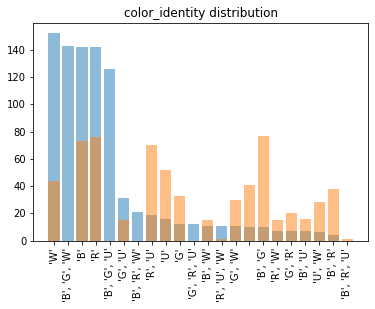

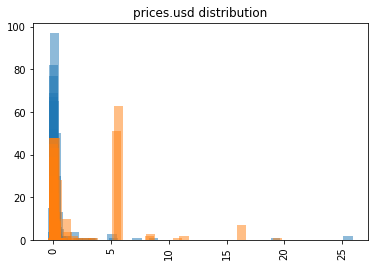

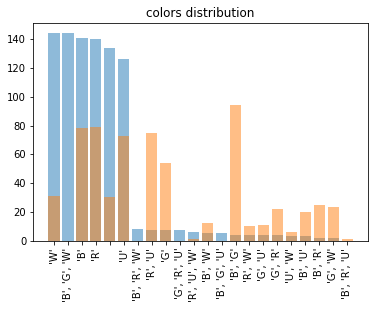

In [ ]:
plot_features("color_identity")
plot_features("prices.usd")
# plot_features("type_line")
plot_features("colors")